In [1]:
import argparse
from argparse import RawTextHelpFormatter
import glob
from os import makedirs
from os.path import join, exists, basename, splitext
# 3p
import cv2
from tqdm import tqdm
# project
from exposure_enhancement import enhance_image_exposure
import numpy as np
from scipy import fft
from skimage import io, exposure, img_as_ubyte, img_as_float 
from tqdm import trange
import matplotlib.pyplot as plt
import argparse
import os
from PIL import Image
import shutil

In [2]:
input_video_path = 'Input Videos/Amazing night vision - ColorVu Camera Demo.mp4'
input_frames_folder =  'input_frames/'
output_fps = 5  # frames per second
duration = 5 # seconds
output_frames_folder1 = 'output_frames_existing/'
output_video_path_existing = 'output_video_existing.avi'
output_frames_folder = 'output_frames/'
output_video_path_proposed = 'output_video_proposed.avi'


In [3]:
from IPython.display import HTML

# Replace 'your_video.mp4' with the actual path or URL of your .mp4 video file
video_path = input_video_path

# Create HTML code to embed the video
video_html = """
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
  Your browser does not support the video tag.
</video>
""".format(video_path)

# Display the HTML code in the Jupyter Notebook
HTML(video_html)

In [4]:
def enhance_image_existing(input_path, output_path):
    # Load the image
    brightness_alpha=1.2
    contrast_beta=10
    gamma=1.5
    img = cv2.imread(input_path)

    # Apply brightness adjustment
    enhanced_brightness = cv2.convertScaleAbs(img, alpha=brightness_alpha, beta=0)

    # Apply contrast adjustment
    enhanced_contrast = cv2.addWeighted(enhanced_brightness, 1, img, 0, contrast_beta)

    # Apply gamma correction for overall enhancement
    enhanced_img = np.power(enhanced_contrast / 255.0, gamma)
    enhanced_img = np.uint8(enhanced_img * 255)

    # Save the enhanced image
    cv2.imwrite(output_path, enhanced_img)
    return enhanced_img

In [5]:

# Open the video file
cap = cv2.VideoCapture(input_video_path)
# Get video properties
#fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
num_frames = output_fps * duration
# Create a video writer object
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can change the codec as needed
out = cv2.VideoWriter(output_video_path_existing, fourcc, 25.0, (frame_width, frame_height))

# Read frames from the video
frame_count = 0
while True:
    ret, frame = cap.read()
    print(f"frame count is {frame_count}")
    # Break the loop if the video is over or the desired number of frames is reached
    if not ret or frame_count >= num_frames:
        break
    # Save the input frame
    input_frame_path = os.path.join(input_frames_folder, f"input_frame_{frame_count + 1}.png")
    frame = cv2.resize(frame, (400, 400))
    cv2.imwrite(input_frame_path, frame)

    # Apply LIME to the input frame and save the output frame
    output_frame_path = os.path.join(output_frames_folder1, f"output_frame_{frame_count + 1}.png")
    enhance_image_existing(input_frame_path, output_frame_path)
    for _ in range(3):
        # Write the output frame to the slow-motion output video
        out.write(cv2.imread(output_frame_path))


    # Write the output frame to the output video
    out.write(cv2.imread(output_frame_path))

    frame_count += 1
    print(f"Output Frames Completed for Existing Method: {frame_count}")

# Release video capture and writer objects
cap.release()


# Release the video writer
out.release()
print(f"Processing completed. Existing Output video created and stored at", output_video_path_existing)

frame count is 0
Output Frames Completed for Existing Method: 1
frame count is 1
Output Frames Completed for Existing Method: 2
frame count is 2
Output Frames Completed for Existing Method: 3
frame count is 3
Output Frames Completed for Existing Method: 4
frame count is 4
Output Frames Completed for Existing Method: 5
frame count is 5
Output Frames Completed for Existing Method: 6
frame count is 6
Output Frames Completed for Existing Method: 7
frame count is 7
Output Frames Completed for Existing Method: 8
frame count is 8
Output Frames Completed for Existing Method: 9
frame count is 9
Output Frames Completed for Existing Method: 10
frame count is 10
Output Frames Completed for Existing Method: 11
frame count is 11
Output Frames Completed for Existing Method: 12
frame count is 12
Output Frames Completed for Existing Method: 13
frame count is 13
Output Frames Completed for Existing Method: 14
frame count is 14
Output Frames Completed for Existing Method: 15
frame count is 15
Output Fram

In [6]:

# Output video file
output_video_file = output_video_path_existing

# Get the list of image files in the folder
image_files = [f for f in os.listdir(output_frames_folder1) if f.endswith('.png')]

# Check if the list of image files is not empty
if not image_files:
    print("No PNG images found in the specified folder.")
else:
    # Sort the image files to ensure proper order
    image_files.sort()

    # Get the first image to determine the video dimensions
    first_image = cv2.imread(os.path.join(output_frames_folder1, image_files[0]))
    height, width, _ = first_image.shape

    # Create a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can change the codec as needed
    out = cv2.VideoWriter(output_video_file, fourcc, 25.0, (width, height))

    # Loop through each image and write it to the video
    for image_file in image_files:
        image_path = os.path.join(output_frames_folder1, image_file)
        frame = cv2.imread(image_path)
        out.write(frame)

    # Release the video writer
    out.release()

    print(f"Video created: {output_video_file}")

Video created: output_video_existing.avi


In [7]:
def enhance_image_with_lime(input_path,output_path):

    image=cv2.imread(input_path)
    enhanced_image = enhance_image_exposure(image, 0.6, 0.15,"lime")    
    # Save the enhanced image
    cv2.imwrite(output_path, enhanced_image)


In [8]:

# Open the video file
cap = cv2.VideoCapture(input_video_path)
# Get video properties
#fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
num_frames = output_fps * duration
# Create a video writer object
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can change the codec as needed
out = cv2.VideoWriter(output_video_path_proposed, fourcc, 25.0, (frame_width, frame_height))

# Read frames from the video
frame_count = 0
while True:
    ret, frame = cap.read()
    print(f"frame count is {frame_count}")
    # Break the loop if the video is over or the desired number of frames is reached
    if not ret or frame_count >= num_frames:
        break
    # Save the input frame
    input_frame_path = os.path.join(input_frames_folder, f"input_frame_{frame_count + 1}.png")
    frame = cv2.resize(frame, (400, 400))
    cv2.imwrite(input_frame_path, frame)

    # Apply LIME to the input frame and save the output frame
    output_frame_path = os.path.join(output_frames_folder, f"output_frame_{frame_count + 1}.png")
    enhance_image_with_lime(input_frame_path, output_frame_path)
    for _ in range(3):
        # Write the output frame to the slow-motion output video
        out.write(cv2.imread(output_frame_path))


    # Write the output frame to the output video
    out.write(cv2.imread(output_frame_path))

    frame_count += 1
    print(f"Output Frames Completed for Proposed Method: {frame_count}")

# Release video capture and writer objects
cap.release()
# Release the video writer
out.release()
print(f"Processing completed. Proposed Output video created and stored at", output_video_path_proposed)

frame count is 0
Output Frames Completed for Proposed Method: 1
frame count is 1
Output Frames Completed for Proposed Method: 2
frame count is 2
Output Frames Completed for Proposed Method: 3
frame count is 3
Output Frames Completed for Proposed Method: 4
frame count is 4
Output Frames Completed for Proposed Method: 5
frame count is 5
Output Frames Completed for Proposed Method: 6
frame count is 6
Output Frames Completed for Proposed Method: 7
frame count is 7
Output Frames Completed for Proposed Method: 8
frame count is 8
Output Frames Completed for Proposed Method: 9
frame count is 9
Output Frames Completed for Proposed Method: 10
frame count is 10
Output Frames Completed for Proposed Method: 11
frame count is 11
Output Frames Completed for Proposed Method: 12
frame count is 12
Output Frames Completed for Proposed Method: 13
frame count is 13
Output Frames Completed for Proposed Method: 14
frame count is 14
Output Frames Completed for Proposed Method: 15
frame count is 15
Output Fram

In [9]:

# Output video file
output_video_file = output_video_path_proposed

# Get the list of image files in the folder
image_files = [f for f in os.listdir(output_frames_folder) if f.endswith('.png')]

# Check if the list of image files is not empty
if not image_files:
    print("No PNG images found in the specified folder.")
else:
    # Sort the image files to ensure proper order
    image_files.sort()

    # Get the first image to determine the video dimensions
    first_image = cv2.imread(os.path.join(output_frames_folder, image_files[0]))
    height, width, _ = first_image.shape

    # Create a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can change the codec as needed
    out = cv2.VideoWriter(output_video_file, fourcc, 25.0, (width, height))

    # Loop through each image and write it to the video
    for image_file in image_files:
        image_path = os.path.join(output_frames_folder, image_file)
        frame = cv2.imread(image_path)
        out.write(frame)

    # Release the video writer
    out.release()

    print(f"Video created: {output_video_file}")

Video created: output_video_proposed.avi


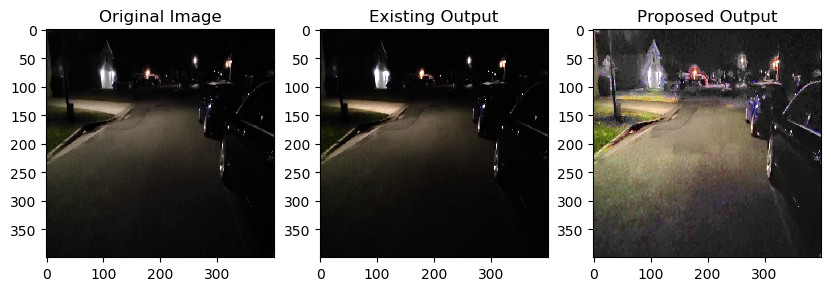

In [10]:
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Existing
brightness_alpha=1.2
contrast_beta=10
gamma=1.5
img = cv2.imread(input_frame_path)
enhanced_brightness = cv2.convertScaleAbs(img, alpha=brightness_alpha, beta=0)
enhanced_contrast = cv2.addWeighted(enhanced_brightness, 1, img, 0, contrast_beta)
enhanced_img1 = np.power(enhanced_contrast / 255.0, gamma)
enhanced_img1 = np.uint8(enhanced_img1 * 255)
    
# proposed
enhanced_img2 = enhance_image_exposure(img, 0.6, 0.15,"lime")    

plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv2.cvtColor(enhanced_img1, cv2.COLOR_BGR2RGB))
plt.title('Existing Output')

plt.subplot(133)
plt.imshow(cv2.cvtColor(enhanced_img2, cv2.COLOR_BGR2RGB))
plt.title('Proposed Output')

plt.show()

In [11]:
def compute_metrics(original, enhanced):
    psnr_value = psnr(original, enhanced)
    
    # Explicitly set win_size to a suitable value
    win_size = 3  # You can adjust this value based on your image size

    # Calculate SSIM with the explicit win_size parameter
    ssim_value, _ = ssim(original, enhanced, full=True, win_size=win_size)

    mse_value = mean_squared_error(original.flatten(), enhanced.flatten())

    return psnr_value, ssim_value, mse_value

In [12]:
psnr_existing, ssim_existing, mse_existing = compute_metrics(img, enhanced_img2)
psnr_proposed, ssim_proposed, mse_proposed = compute_metrics(img, enhanced_img1)

print("Metrics for Existing Enhancement:")
print("PSNR:", psnr_existing)
print("SSIM:", ssim_existing)
print("MSE:", mse_existing)

print("\nMetrics for Proposed Enhancement:")
print("PSNR:", psnr_proposed)
print("SSIM:", ssim_proposed)
print("MSE:", mse_proposed)

Metrics for Existing Enhancement:
PSNR: 13.491951857084704
SSIM: 0.35207910264362413
MSE: 112.71297708333333

Metrics for Proposed Enhancement:
PSNR: 30.27884795222684
SSIM: 0.930162199826174
MSE: 54.92781041666667
